# Estimate the flux qubit coherence time ($T_2$) given the flux spectrum

In [1]:
import circuitq as cq

import numpy as np
import networkx as nx
import scqubits as sc
import matplotlib.pyplot as plt

/Users/tim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Define flux qubit Hamiltonian

In [2]:
# Circuit graph
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'J')
graph.add_edge(1,2, element = 'C')
graph.add_edge(1,2, element = 'J')
graph.add_edge(0,2, element = 'C')
graph.add_edge(0,2, element = 'J');

In [3]:
# Define circuit object
circuit = cq.CircuitQ(graph)
circuit.h_parameters

[C_{01}, C_{02}, C_{12}, E_{J010}, E_{J020}, E_{J120}, \tilde{\Phi}_{120}]

In [4]:
# Circuit parameters and numerical Hamiltonian
dim = 100
grid_length = np.pi
EJ = circuit.c_v["E"]
alpha = 0.7
C = circuit.c_v["C"]
h_num = circuit.get_numerical_hamiltonian(dim, parameter_values=[C,C,C,EJ,EJ,alpha*EJ,0], grid_length=grid_length)

### Compute flux spectrum

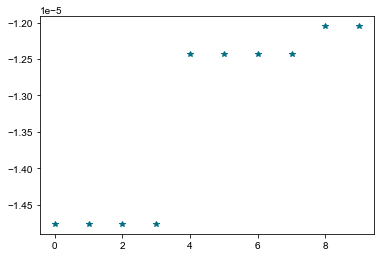

In [24]:
# Test which eigenvalue is the second excited state
eigv, eigs = circuit.get_eigensystem(10)
plt.plot(eigv, '*')

In [20]:
phi_ex_list = np.linspace(0,2,21)
eigv_list = []
for phi_ex in phi_ex_list/circuit.phi_0:
    print('*')
    params = [C,C,C,EJ,EJ,alpha*EJ,phi_ex]
    h_num = circuit.get_numerical_hamiltonian(dim, parameter_values=params, grid_length=grid_length)
    eigv, eigs = circuit.get_eigensystem()
    eigv_list.append(eigv[:10])

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


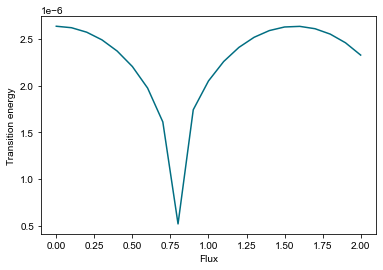

In [29]:
# Plot absolute values of eigenenergies
plt.figure()
plt.plot(phi_ex_list, eigv_list[:,4]-eigv_list[:,0])
plt.xlabel('Flux')
plt.ylabel('Transition energy')
plt.show()

In [ ]:
# Plot transition frequency
plt.figure()
plt.plot(phi_ex_list, eigv_list)
plt.xlabel('Flux')
plt.ylabel('Absolute energy')
plt.show()

<p style="color:red;">*To be discussed:* The spectrum above looks like what's expected from a flux qubit. However, Tim is unsure about the units of capacitances, inductances, Josephson energies, and the flux quantum. Can we come up with a conversion from SI units? And `circuit.phi_0` doesn't seem to give the right value of the flux quantum.</p>

### Estimate coherence time

We the dephasing time is not decay time limited, it can be estimated from the slope of the transition spectrum [1]:

\begin{equation}
\Gamma_\phi^E = \sqrt{A_\Phi \text{ln}2} \left| \partial\omega_{01}/\partial\Phi \right|,
\end{equation}

where $\omega_{01}$ is the transition frequency, $\Phi$ the external flux, and $\sqrt{A_\Phi}$ the noise amplitude of the noise power spectral density $S_\Phi\left(\omega\right) = A_\Phi/\left|\omega\right|$. The noise amplitude is a setup-specific constant and we can ingore it when comparing different qubit candidates: It's sufficient to compare the slopes of the spectra. When we want to compare to other time scales, for example the decay time, however, we need a number for the noise amplitude. Based on Ref. [1], $\sqrt{A_\Phi} = 1\mu\Phi_0$ is an optimistic but reasonable value.

If we want to also estimate $T_1$ times, we can use the formulas from "Supplementary Note 8" in [2]. This will require finding the current and voltage operators of the relevant circuit branches.

[1] Jochen Braumüller et al., "Characterizing and optimizing qubit coherence based on SQUID geometry." arXiv preprint arXiv:2002.09372 (2020).

[2] Fei Yan et al., "The flux qubit revisited to enhance coherence and reproducibility," Nature communications 7, 1 (2016).